In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_seq import PlotSeq
from layout import Layout

src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [2]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['specie'] = df['specie'].map(lambda x: x.replace('_', ' '))
chain_types = {'H': 'Heavy', 'K': 'Kappa', 'L': 'Lambda',}
df['chain_type'] = df['chain_type'].map(lambda x: chain_types[x] if x in chain_types else x)
print(len(df))
df.head(3)

29496


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_A_0,0,A,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.1,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,IGHV7-3*02,Mus musculus,IGHV7-3,IGHV7,Heavy,3IJH,3IJH_0_B_0,0,B,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.1,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0
2,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_C_0,0,C,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.1,34.2494,meta_chain_faa/3I/3IJH/3IJH_0_C_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_C_0.pdb,0.0


In [3]:
df['specie'].value_counts()

specie
Homo sapiens             14220
Mus musculus              8365
Vicugna pacos             2324
Macaca mulatta            1305
Gorilla gorilla           1048
Pongo pygmaeus             594
Oryctolagus cuniculus      469
Pongo abelii               345
Rattus norvegicus          263
Bos taurus                 157
Macaca fascicularis        110
Lemur catta                108
Gallus gallus               75
Sus scrofa                  52
Mus spretus                 24
Canis lupus                 12
Mustela putorius             8
Felis catus                  7
Camelus dromedarius          5
Equus caballus               3
Capra hircus                 2
Name: count, dtype: int64

figure size: 11.4 x 8 cm


<Axes: >

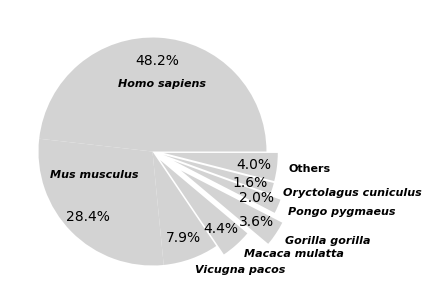

In [4]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 7,
    'explode': [0, 0, 0, .1, .3, .2, .1, .1],
    'angle': 0,  'ha': 'left',
    'pctdistance':.8, 'labeldistance':1.1,
}
PlotSeq(df).pie_specie_counts(ax, params)

figure size: 11.4 x 8 cm


<Axes: >

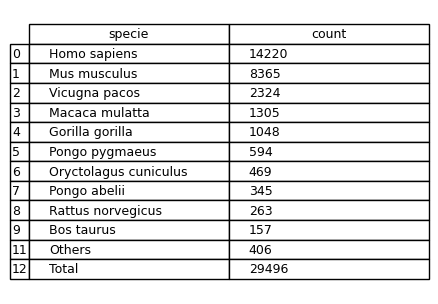

In [5]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 10,}
PlotSeq(df).table_species(ax, params)

['Homo sapiens', 'Mus musculus']


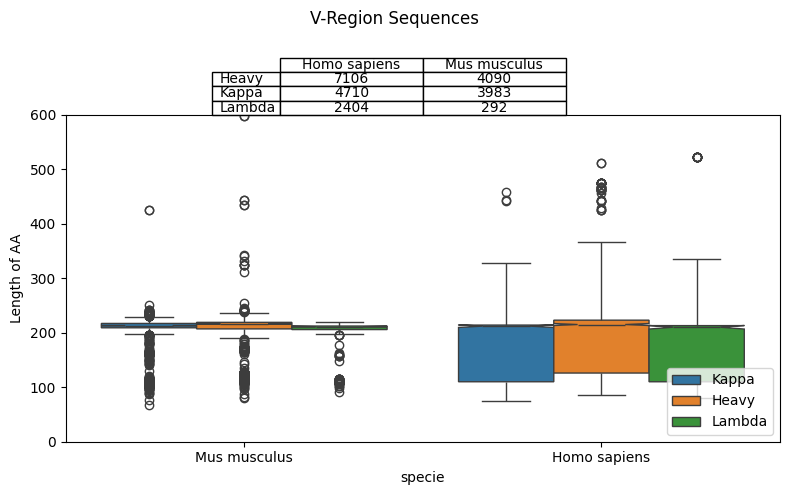

specie,Homo sapiens,Mus musculus
chain_type,,
Heavy,7106,4090
Kappa,4710,3983
Lambda,2404,292


In [6]:
PlotSeq(df).plot_summary(n=2)

### human

figure size: 8.5 x 5 cm
(14220, 19)


<Axes: ylabel='Number of\ngene families'>

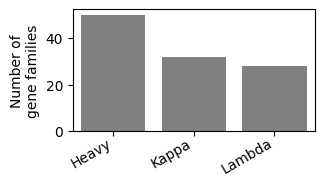

In [7]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_gene_family(ax, params)

figure size: 8.5 x 5 cm
(14220, 19)


<Axes: ylabel='Number of\nallele names'>

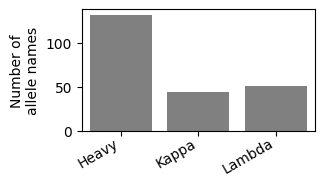

In [8]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_allele_name(ax, params)

figure size: 8.5 x 5 cm
(14220, 19)


<Axes: ylabel='Number of\nunique sequences'>

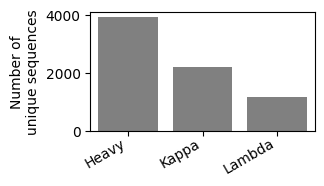

In [9]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).bar_chain_seq(ax, params)

figure size: 8.5 x 6 cm
(14220, 19)


<Axes: xlabel='Chain of antibody', ylabel='Length of AA'>

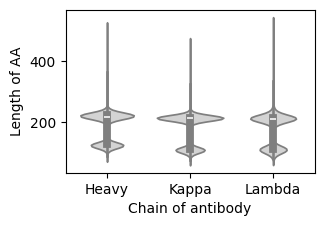

In [10]:
args = {'width_level': 1, 'height': 6}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens"}
PlotSeq(df).box_chain_len(ax, params)

figure size: 17.4 x 8 cm
(14137, 19)


<Axes: xlabel='Length of AA', ylabel='Count'>

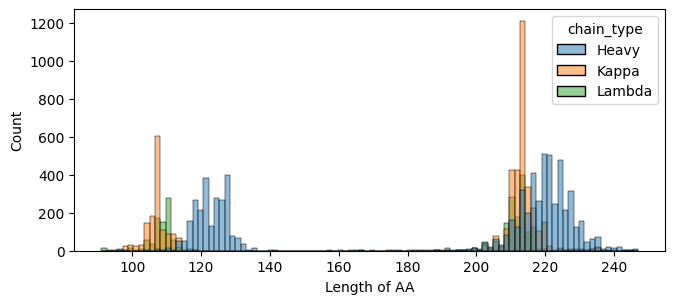

In [11]:
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
params = {'specie': "Homo sapiens", 'bins': 100, 'min_len':90, 'max_len':250}
PlotSeq(df).hist_chain_len(ax, params)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

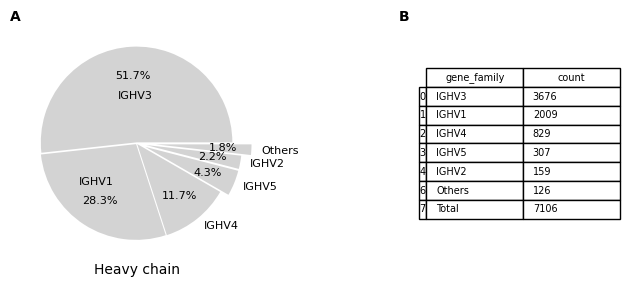

In [29]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Heavy'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .1, .1, .2], 'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 8.5 x 6 cm
  gene_family  count    percent
0       IGHV3   3676  51.730932
1       IGHV1   2009  28.271883
2       IGHV4    829  11.666198
3       IGHV5    307   4.320293
4       IGHV2    159   2.237546
5       IGHV6     68   0.956938
6       IGHV7     45   0.633268
7  IGHV4/OR15     10   0.140726
8  IGHV3/OR16      3   0.042218


<Axes: title={'center': 'Heavy chain'}, xlabel='Percentage, %', ylabel='Allele names'>

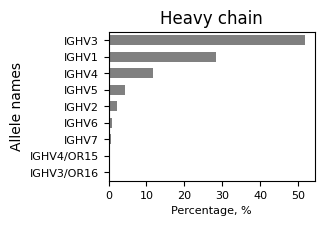

In [31]:
args = {'width_level': 1, 'height': 6}
fig, ax = Layout(args).one()
n = 20
params = {'ylabel': 'Allele names', 'bar_width':.6}
PlotSeq(df).bar_specie_chain(ax, specie, chain_type, key, n, params)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

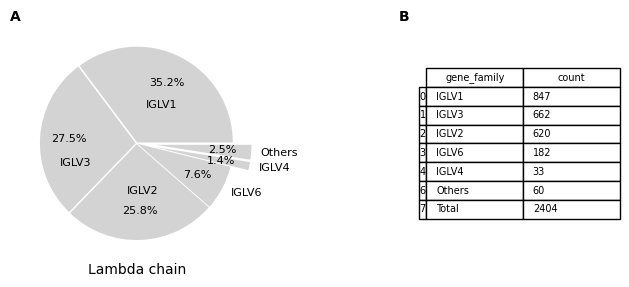

In [32]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .01, .2, .2], 'label_pos':{0: (.1, .4), 1: (-.8, -.2), 2: (-.1, -.5)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 17.4 x 7 cm
Homo sapiens, number of pies: 6


<Axes: >

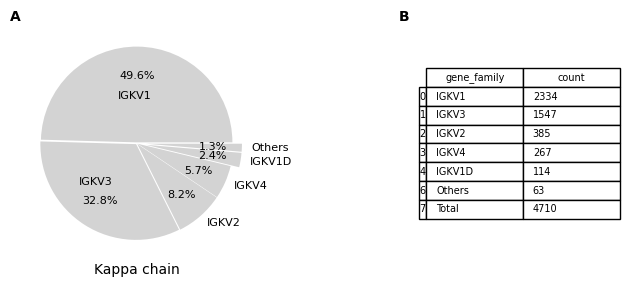

In [33]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Homo sapiens"
chain_type = 'Kappa'
key = 'gene_family'
n = 5
params = {'explode': [.01, .01, .01, .01, .1, .1],  'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

### mouse

figure size: 8.5 x 5 cm
(8365, 19)


<Axes: ylabel='Number of\ngene families'>

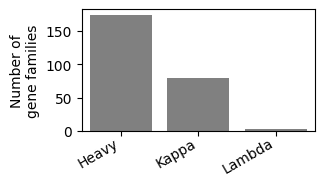

In [34]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_gene_family(ax, params)

figure size: 8.5 x 5 cm
(8365, 19)


<Axes: ylabel='Number of\nallele names'>

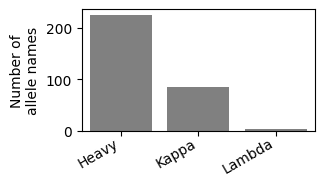

In [36]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_allele_name(ax, params)

figure size: 8.5 x 5 cm
(8365, 19)


<Axes: ylabel='Number of\nunique sequences'>

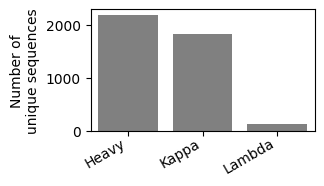

In [37]:
args = {'width_level': 1, 'height': 5}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).bar_chain_seq(ax, params)

figure size: 8.5 x 6 cm
(8365, 19)


<Axes: xlabel='Chain of antibody', ylabel='Length of AA'>

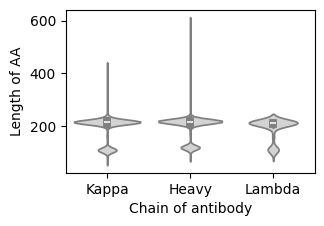

In [38]:
args = {'width_level': 1, 'height': 6}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus"}
PlotSeq(df).box_chain_len(ax, params)

figure size: 17.4 x 8 cm
(8340, 19)


<Axes: xlabel='Length of AA', ylabel='Count'>

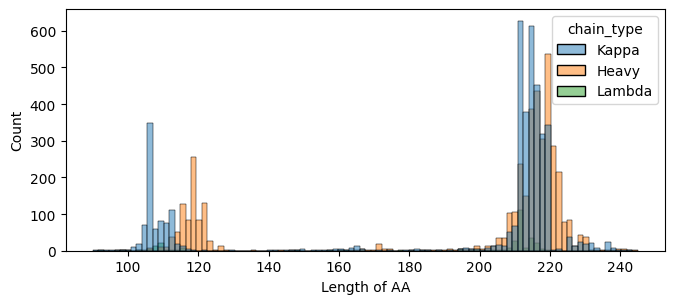

In [39]:
args = {'width_level': 3, 'height': 8}
fig, ax = Layout(args).one()
params = {'specie': "Mus musculus", 'bins': 100, 'min_len':90, 'max_len':250}
PlotSeq(df).hist_chain_len(ax, params)

figure size: 17.4 x 7 cm
Mus musculus, number of pies: 11


<Axes: >

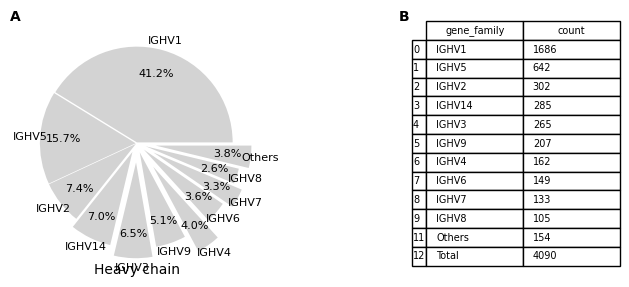

In [41]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Heavy'
key = 'gene_family'
n = 10
params = {
    'explode': [.01, .01, .01, .1, .2, .1, .3, .1, .2, .1, .2], 
    'angle':0, 'ha':'center', 'pctdistance':.75,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 17.4 x 7 cm
Mus musculus, number of pies: 3


<Axes: >

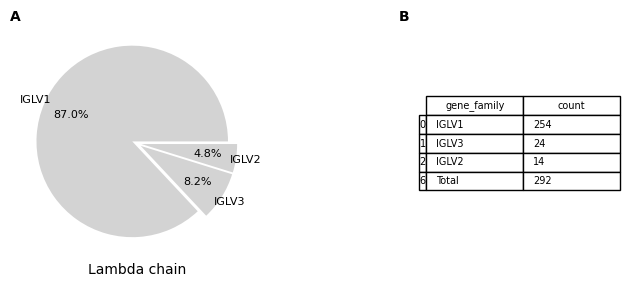

In [42]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
params = {
    'explode': [.05, .05, .05], 
    'angle':0, 'ha':'center', 'pctdistance':.7,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

figure size: 17.4 x 7 cm
Mus musculus, number of pies: 11


<Axes: >

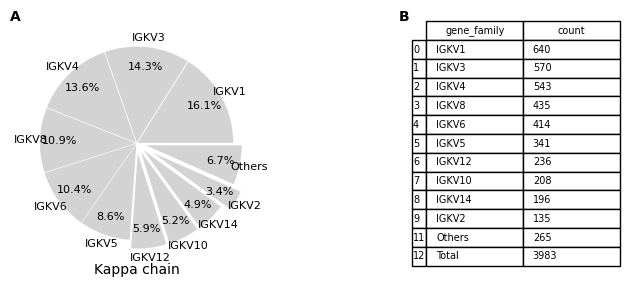

In [43]:
# most abundant IMGT gene names
args = {'width_level': 3, 'height': 7, 'width_ratios':[2, 1]}
label_x = (-5, -20)
label_y = 10
fig, axes = Layout(args).row(label_x, label_y)

specie = "Mus musculus"
chain_type = 'Kappa'
key = 'gene_family'
n = 10
params = {
    'explode': [.01, .01, .01, .01, .01, .01, .1, .1, .1, .2, .1], 
    'angle':0, 'ha':'center', 'pctdistance':.8,
}
ps = PlotSeq(df)
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
ps.table_specie_chain(axes[1], specie, chain_type, key, n)

## figures

figure size: 11.4 x 8 cm


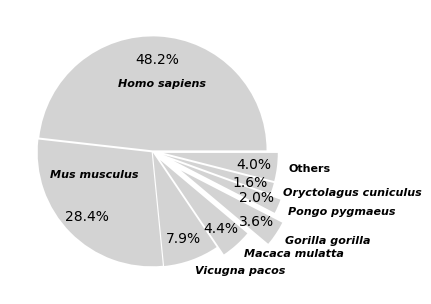

In [44]:
args = {'width_level': 2, 'height': 8}
fig, ax = Layout(args).one()

params = {'n': 7, 'explode': [.01, .01, .01, .1, .3, .2, .1, .1],
    'pctdistance':.8, 'labeldistance':1.1,}
PlotSeq(df, False).pie_specie_counts(ax, params)

fig.savefig('../figures/count_specie_antibody.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 5 cm


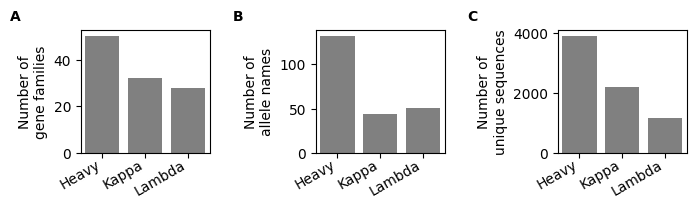

In [56]:
args = {'width_level': 3, 'height': 5, 'space':.1}
label_x = (-51, -60, -65)
label_y = 15
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
params = {'specie': "Homo sapiens"}
ps.bar_gene_family(axes[0], params)
ps.bar_allele_name(axes[1], params)
ps.bar_chain_seq(axes[2], params)

fig.savefig(f'../figures/{specie}_chain_type.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 9 cm


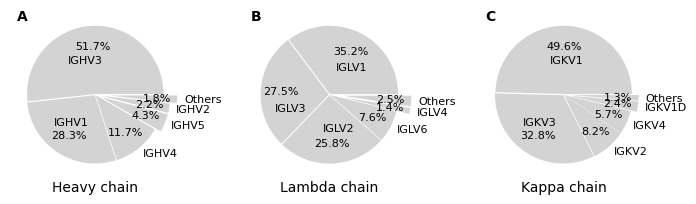

In [55]:
args = {'width_level': 3, 'height': 9, 'space':.1}
label_x = (5,) * 3
label_y = 0
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
specie = "Homo sapiens"
key = 'gene_family'
n = 5

chain_type = 'Heavy'
params = {'explode': [.01, .01, .01, .1, .1, .2], 'label_pos':{0: (-.4, .5), 1: (-.6, -.4)}}
ps.pie_specie_chain(axes[0], specie, chain_type, key, n, params)
chain_type = 'Lambda'
params = {'explode': [.01, .01, .01, .01, .2, .2], 'label_pos':{0: (.1, .4), 1: (-.8, -.2), 2: (-.1, -.5)}}
ps.pie_specie_chain(axes[1], specie, chain_type, key, n, params)
chain_type = 'Kappa'
params = {'explode': [.01, .01, .01, .01, .1, .1],  'label_pos':{0: (-.2, .5), 1: (-.6, -.4)}}
ps.pie_specie_chain(axes[2], specie, chain_type, key, n, params)

fig.savefig(f'../figures/{specie}_imgt_{key}.tif', dpi=300, bbox_inches='tight', pad_inches=.05)

figure size: 17.4 x 16 cm


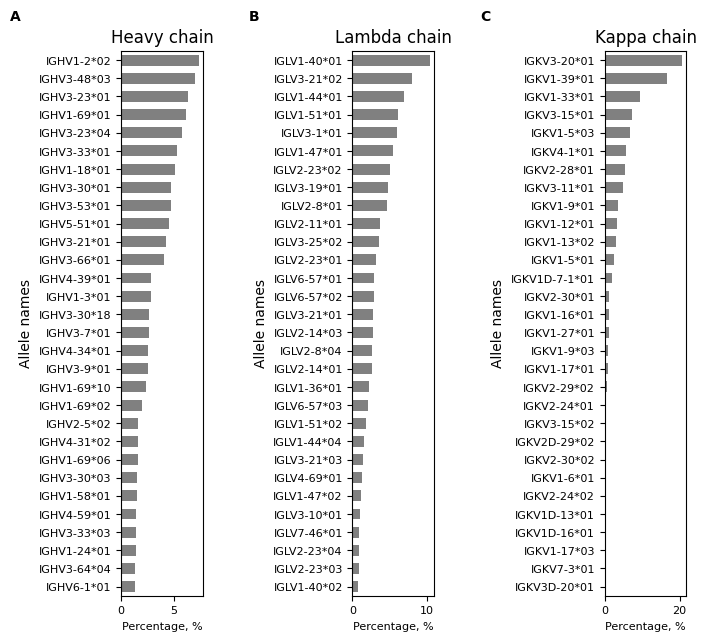

In [58]:
args = {'width_level': 3, 'height': 16, 'space':.2}
label_x = (-80, -75, -90)
label_y = 30
fig, axes = Layout(args).row(label_x, label_y)

ps = PlotSeq(df, False)
specie = "Homo sapiens"
key = 'allele_name'
n = 30
params = {'ylabel': 'Allele names', 'bar_width':.6}

chain_type = 'Heavy'
ps.bar_specie_chain(axes[0], specie, chain_type, key, n, params)
chain_type = 'Lambda'
ps.bar_specie_chain(axes[1], specie, chain_type, key, n, params)
chain_type = 'Kappa'
ps.bar_specie_chain(axes[2], specie, chain_type, key, n, params)

fig.savefig(f'../figures/{specie}_imgt_{key}.tif', dpi=300, bbox_inches='tight', pad_inches=.05)